In [1]:
import hashlib
password = "Pas$word98"
hash = hashlib.md5(password.encode())
print(hash.hexdigest())

ced6ae201b2503a01f7a79122a75b380


In [112]:
from scipy.io import wavfile
x, fs = librosa.load('/Users/mayabridgman/Documents/UrbanSound8K/audio/fold4/344-3-0-0.wav')

In [15]:

import librosa
import librosa.display
import matplotlib.pyplot as plt
import sklearn
import numpy as np

Text(0.5, 1.0, 'ZCR')

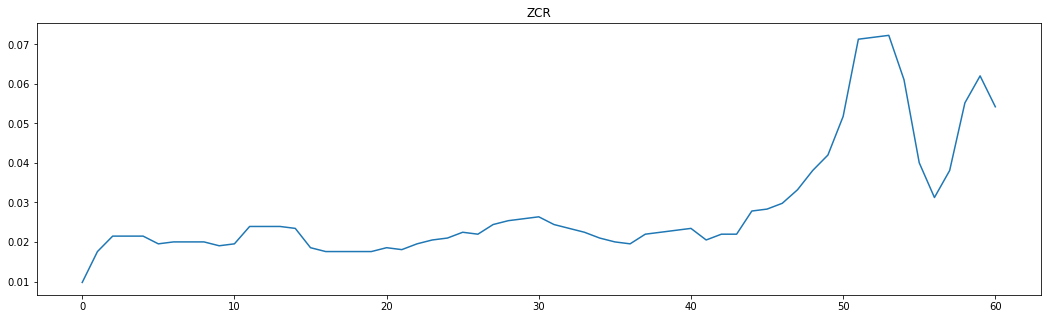

In [22]:
#zero crossing rate
#ZCR is high for noisy (unvoiced) sounds and low for tonal (voiced) sounds. It is used to calculate the smoothness of the signal. For simple periodic signals, it is roughly related to the fundamental frequency.

#zcrs = librosa.feature.zero_crossing_rate(x + 0.0001)
plt.figure(figsize=(18, 5))
plt.plot(zcrs[0])
plt.title('ZCR')

In [50]:
x

22050

In [52]:
#cent = librosa.feature.spectral_centroid(y=x, sr=fs)

In [119]:
cent.shape

(1, 28)

In [23]:
zcrs.mean()

0.028400358606557378

In [60]:
cent.shape

(1, 28)

In [78]:
zcrs[:,:-33].shape

(1, 28)

In [55]:
#could possible use kron to calcualte
p.kron(cent, zcrs).shape

(1, 1708)

In [80]:
np.stack((cent, zcrs[:,:-33]), axis=1)

array([[[1.32235827e+03, 1.31444515e+03, 1.19379084e+03, 1.05831114e+03,
         1.01537625e+03, 9.82115922e+02, 1.06665584e+03, 1.04645450e+03,
         1.02595364e+03, 8.93539077e+02, 1.01788214e+03, 1.35965238e+03,
         1.63202610e+03, 1.82621592e+03, 1.87906083e+03, 1.81852733e+03,
         1.60906382e+03, 1.38613535e+03, 1.17811036e+03, 1.06341422e+03,
         1.10587879e+03, 1.55534155e+03, 1.88052239e+03, 2.15226379e+03,
         2.48356488e+03, 2.23079613e+03, 2.09330836e+03, 2.47215495e+03],
        [9.76562500e-03, 1.75781250e-02, 2.14843750e-02, 2.14843750e-02,
         2.14843750e-02, 1.95312500e-02, 2.00195312e-02, 2.00195312e-02,
         2.00195312e-02, 1.90429688e-02, 1.95312500e-02, 2.39257812e-02,
         2.39257812e-02, 2.39257812e-02, 2.34375000e-02, 1.85546875e-02,
         1.75781250e-02, 1.75781250e-02, 1.75781250e-02, 1.75781250e-02,
         1.85546875e-02, 1.80664062e-02, 1.95312500e-02, 2.05078125e-02,
         2.09960938e-02, 2.24609375e-02, 2.1972656

In [89]:
np.sum((cent - zcrs[:,:-33])**2)

68298385.1689111

In [110]:
fs, x = wavfile.read('/Users/mayabridgman/Documents/UrbanSound8K/audio/fold4/344-3-4-0.wav')

In [30]:
x

array([-535, -494, -371, ...,  340,  844, 1216], dtype=int16)

In [36]:
x2

array([-136,  -98,  -65, ...,   65,   76,   65], dtype=int16)

_______________________________________________________

Text(0.5, 1.0, 'audio')

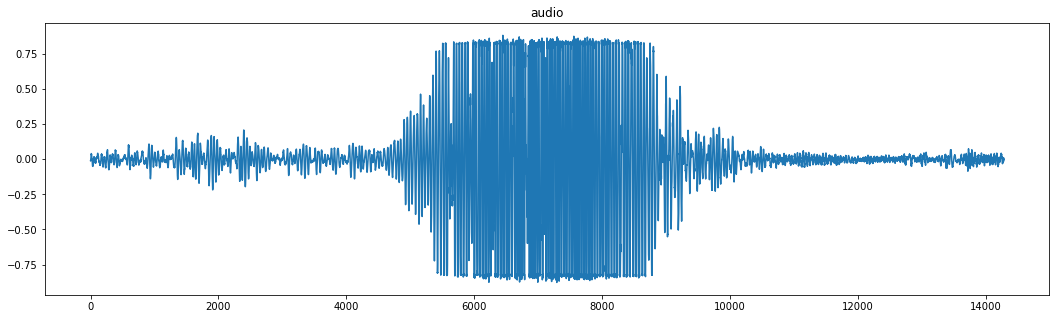

In [118]:
plt.figure(figsize=(18, 5))
plt.plot(x)
plt.title('audio')

Text(0.5, 1.0, 'ZCR')

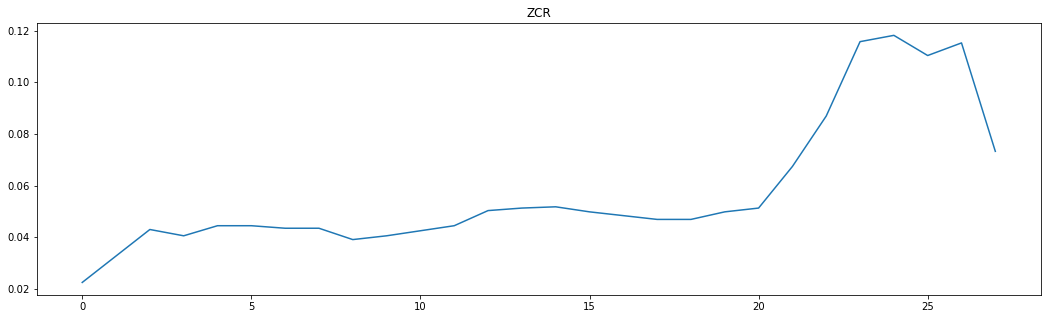

In [123]:
zcrs = librosa.feature.zero_crossing_rate(x)
plt.figure(figsize=(18, 5))
plt.plot(zcrs[0])
plt.title('ZCR')

In [114]:
zcrs.mean()

0.057582310267857144

In [ ]:
#maybe just take average or square root sum of all values aand literally just compare on individual levels bc otherwise data is lost

<function matplotlib.pyplot.show(close=None, block=None)>

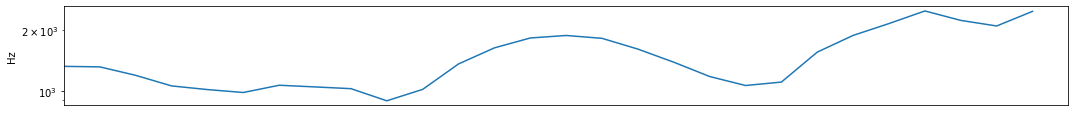

In [115]:
cent = librosa.feature.spectral_centroid(y=x, sr=fs)
plt.figure()
plt.subplot(2, 1, 1)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.show

In [99]:
pitches, magnitudes = librosa.core.piptrack(y=x, sr=fs, fmin=75, fmax=1600)

In [100]:
# get indexes of the maximum value in each time slice
max_indexes = np.argmax(magnitudes, axis=0)
 # get the pitches of the max indexes per time slice
pitches = pitches[max_indexes, range(magnitudes.shape[1])]

In [101]:
freq = fs * 1

In [103]:
#https://medium.com/prathena/the-dummys-guide-to-mfcc-aceab2450fd
2595.0 * np.log10(1.0 + freq / 700.0)

3923.337321740179

In [116]:
# Compute the spectrogram (magnitude)
n_fft = 2048
hop_length = 1024
spec_mag = abs(librosa.stft(x, n_fft=n_fft, hop_length=hop_length))

# Convert the spectrogram into dB
spec_db = librosa.amplitude_to_db(spec_mag)

# Compute A-weighting values
freqs = librosa.fft_frequencies(sr=fs, n_fft=n_fft)
a_weights = librosa.A_weighting(freqs)
a_weights = np.expand_dims(a_weights, axis=1)

# Apply the A-weghting to the spectrogram in dB
spec_dba = spec_db + a_weights

# Compute the "loudness" value
loudness = librosa.feature.rms(S=librosa.db_to_amplitude(spec_dba))

/Users/mayabridgman/opt/anaconda3/lib/python3.7/site-packages/librosa/core/convert.py:1336: RuntimeWarning: divide by zero encountered in log10
  - 0.5 * np.log10(f_sq + const[3])


In [117]:
loudness

array([[0.00832133, 0.01860202, 0.03183437, 0.01917639, 0.02068301,
        0.13004901, 0.30208725, 0.34465498, 0.30196858, 0.10800534,
        0.02676168, 0.0106758 , 0.00636065, 0.00977924]])

In [ ]:
#https://athina-b.medium.com/audio-signal-feature-extraction-for-analysis-507861717dc1

In [124]:
x, fs = librosa.load('/Users/mayabridgman/Downloads/siren.wav')

Text(0.5, 1.0, 'ZCR')

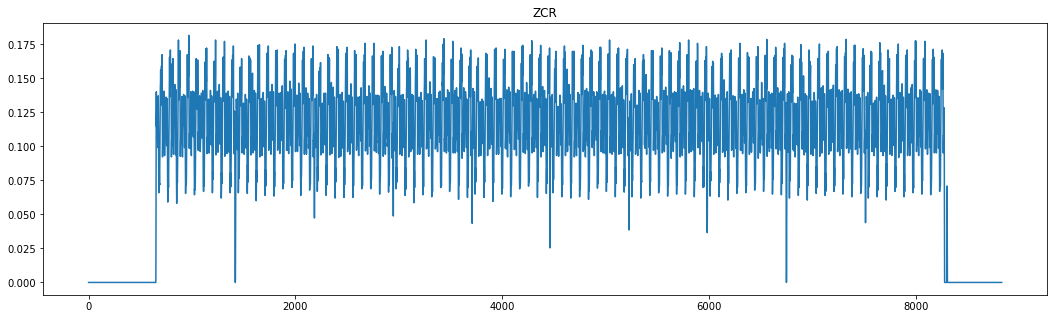

In [128]:
zcrs1 = librosa.feature.zero_crossing_rate(x)
plt.figure(figsize=(18, 5))
plt.plot(zcrs1[0])
plt.title('ZCR')

In [129]:
zcrs1.mean()

0.10217268570609715

In [131]:
y, gs = librosa.load('/Users/mayabridgman/Downloads/crowd.wav')

Text(0.5, 1.0, 'ZCR')

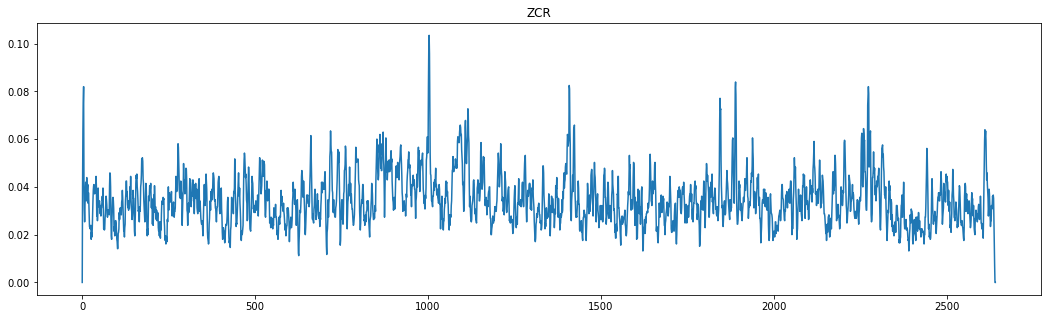

In [132]:
zcrs2 = librosa.feature.zero_crossing_rate(y)
plt.figure(figsize=(18, 5))
plt.plot(zcrs2[0])
plt.title('ZCR')

In [133]:
zcrs2.mean()

0.034572198326864825